In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 50)

import os
# Use this to see how much memory the dataframes use
from sys import getsizeof

import pseudopeople
# from vivarium_research_prl.noise import corruption, fake_names, noisify
# from vivarium_research_prl.find_kids import datasets, noisify_data

!date
!whoami
!uname -a
!pwd

Wed Mar 29 14:56:54 PDT 2023
pletale
Linux long-slurm-sarchive-p0041 5.4.0-135-generic #152-Ubuntu SMP Wed Nov 23 20:19:22 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
/mnt/share/code/pletale/PRL/vivarium_research_prl/model_validation


In [2]:
# from vivarium_research_prl import datatypes

# PRL V&V - Decennial Census Observer
Systematic validation

In [3]:
%cd /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/vv_tax_observers/united_states_of_america/2023_03_06_12_42_55/final_results/2023_03_14_16_41_22
!ls -halt

/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/vv_tax_observers/united_states_of_america/2023_03_06_12_42_55/final_results/2023_03_14_16_41_22
total 14G
drwxrwsr-x  2 albrja IHME-Simulationscience 4.0K Mar 22 16:44 .
-rw-r--r--  1 albrja IHME-Simulationscience  59M Mar 15 10:01 wic_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 1.5G Mar 15 10:01 tax_dependents_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 6.8G Mar 15 09:57 tax_w2_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 4.1G Mar 15 09:56 tax_1040_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 192M Mar 15 09:48 social_security_observer.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience  35M Mar 15 09:36 household_survey_observer_cps.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 6.7M Mar 15 09:36 household_survey_observer_acs.csv.bz2
-rw-r--r--  1 albrja IHME-Simulationscience 638M Mar 15 09:36 decennial_census_observer.csv.bz2
drwx

In [4]:
%%time

df = pd.read_csv('decennial_census_observer.csv.bz2', low_memory=False, #dtype='category',
                 nrows=10_000_000
                )

CPU times: user 1min 35s, sys: 6.36 s, total: 1min 41s
Wall time: 1min 42s


In [5]:
df

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
0,M,2020,77566.0,Standard,2284_0,2284_-1,Latino,1982-02-09,Ticas,Michael,38.141742,adams st,sour lake,2284_-1,Reference person,Male,NaN,7136,TX
1,M,2020,77566.0,Standard,2284_1,2284_-1,Latino,1983-09-02,Ticas,Melissa,36.580000,adams st,sour lake,2284_-1,Opp-sex spouse,Female,NaN,7136,TX
2,L,2020,77566.0,Standard,2284_2,2284_0,Latino,2007-10-04,Ticas,Martin,12.492590,adams st,sour lake,2284_1,Biological child,Male,NaN,7136,TX
3,L,2020,77566.0,Standard,2284_3,2284_0,Latino,2011-11-09,Ticas,Maya,8.392918,adams st,sour lake,2284_1,Biological child,Female,NaN,7136,TX
4,M,2020,22209.0,Standard,2284_4,2284_-1,White,1960-01-28,Sayah,Randy,60.175473,north burgher avenue,leesburg,2284_-1,Reference person,Male,NaN,10233,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,A,2030,11237.0,Other non-institutional,4344_856981,4344_-1,Black,1973-11-28,Eanes,Norman,56.305325,essex road,bethlehem,4344_-1,Noninstitutionalized GQ pop,Male,NaN,4745,NY
9999996,N,2030,36207.0,Standard,4344_856982,4344_856980,Black,2006-05-22,Eanes,Ayden,23.826587,n vail ave,birmingham,4344_856981,Reference person,Male,NaN,217,AL
9999997,F,2030,80017.0,Standard,4344_856984,4344_-1,White,1947-12-27,Smith,Jenny,82.229716,dunlavin gln rd,dumont,4344_-1,Reference person,Female,NaN,206,CO
9999998,R,2030,34953.0,Standard,4344_856985,4344_-1,White,1955-03-08,Supeck,Betty,75.034620,tranquilla dr,pensacola,4344_-1,Reference person,Female,NaN,343,FL


In [6]:
df.iloc[0].to_dict()

{'middle_initial': 'M',
 'census_year': 2020,
 'zipcode': 77566.0,
 'housing_type': 'Standard',
 'simulant_id': '2284_0',
 'guardian_1': '2284_-1',
 'race_ethnicity': 'Latino',
 'date_of_birth': '1982-02-09',
 'last_name': 'Ticas',
 'first_name': 'Michael',
 'age': 38.14174167482581,
 'street_name': 'adams st',
 'city': 'sour lake',
 'guardian_2': '2284_-1',
 'relation_to_household_head': 'Reference person',
 'sex': 'Male',
 'unit_number': nan,
 'street_number': '7136',
 'state': 'TX'}

## Known (potential) VV issues
- Do zipcode and age need to be floats? And does 'age' need so many decimal digits?

## Checking data type

In [7]:
df.dtypes

middle_initial                 object
census_year                     int64
zipcode                       float64
housing_type                   object
simulant_id                    object
guardian_1                     object
race_ethnicity                 object
date_of_birth                  object
last_name                      object
first_name                     object
age                           float64
street_name                    object
city                           object
guardian_2                     object
relation_to_household_head     object
sex                            object
unit_number                    object
street_number                  object
state                          object
dtype: object

## Checking Census Year

In [8]:
df.census_year.nunique() # Good - we see census from both years! 

2

## Checking names 
- All 26 letters should be represented as a simulant middle initial
- Most common and least common first and last names should be as expected
- Most common and least common first and last names stratified by race/ethnicity should be as expected

In [9]:
df.middle_initial.nunique()  # expect 26

26

In [10]:
assert df.middle_initial.nunique()  == 26, 'expect all 26 letters to appear as a middle initial for somebody'

In [11]:
df.first_name.value_counts()

Michael    140028
James      114304
John       110415
David      106692
Robert     101687
            ...  
Covey           1
Huyen           1
Xadrian         1
Advait          1
Brewer          1
Name: first_name, Length: 18347, dtype: int64

[]

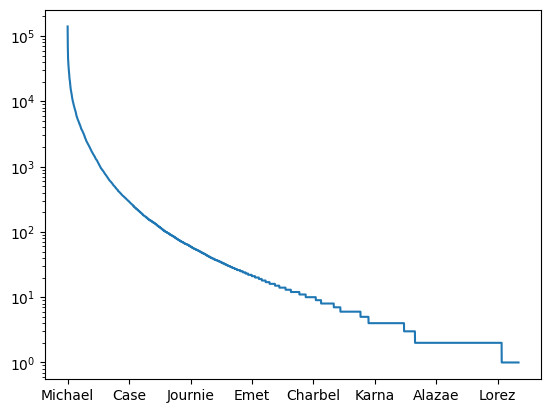

In [12]:
df.first_name.value_counts().plot()
plt.semilogy()

## Checking age distribution
- no weird spikes
- checking how different segments of the population compare (i.e., sex, relation to household head)

<Axes: >

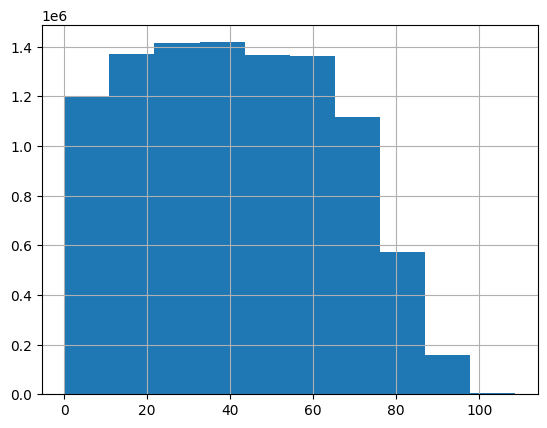

In [13]:
df.age.hist()

In [14]:
df.age.max()

108.6736238627424

## Checking household structure distribution
- Group quarters population should be about 3% of the total population 
- Each household should have a reference person and at most one spouse/partner 
- 23% of female reference people and 5% of male reference people should be without a listed spouse  

In [15]:
df_refs = df[df.relation_to_household_head == 'Reference person']
df_refs

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
0,M,2020,77566.0,Standard,2284_0,2284_-1,Latino,1982-02-09,Ticas,Michael,38.141742,adams st,sour lake,2284_-1,Reference person,Male,NaN,7136,TX
4,M,2020,22209.0,Standard,2284_4,2284_-1,White,1960-01-28,Sayah,Randy,60.175473,north burgher avenue,leesburg,2284_-1,Reference person,Male,NaN,10233,VA
7,M,2020,75024.0,Standard,2284_7,2284_-1,Multiracial or Other,1984-07-20,Kohtz,Michael,35.700136,commonwealth avnue,houston,2284_-1,Reference person,Male,NaN,1312,TX
10,D,2020,8721.0,Standard,2284_10,2284_-1,Latino,1960-01-11,Reiter,Keith,60.222370,e 72 st,brielle,2284_-1,Reference person,Male,NaN,427,NJ
14,O,2020,71103.0,Standard,2284_14,2284_-1,White,1952-10-29,Herrod,Richard,67.423246,boyd avenue,doyline,2284_-1,Reference person,Male,NaN,12540,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999993,R,2030,83686.0,Standard,4344_856979,4344_-1,White,1954-11-30,Cordell,Gerald,75.302287,seven pines ct,rigby,4344_-1,Reference person,Male,NaN,8439,ID
9999996,N,2030,36207.0,Standard,4344_856982,4344_856980,Black,2006-05-22,Eanes,Ayden,23.826587,n vail ave,birmingham,4344_856981,Reference person,Male,NaN,217,AL
9999997,F,2030,80017.0,Standard,4344_856984,4344_-1,White,1947-12-27,Smith,Jenny,82.229716,dunlavin gln rd,dumont,4344_-1,Reference person,Female,NaN,206,CO
9999998,R,2030,34953.0,Standard,4344_856985,4344_-1,White,1955-03-08,Supeck,Betty,75.034620,tranquilla dr,pensacola,4344_-1,Reference person,Female,NaN,343,FL


<Axes: >

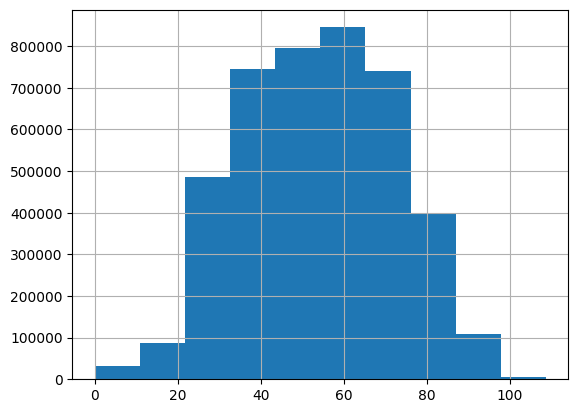

In [16]:
df_refs.age.hist()

In [17]:
df_refs.age.min() # How is there a 6 year old reference person? 

0.0766598220396988

In [18]:
df_baby_refs = df_refs[df_refs.age < 18]
df_baby_refs

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
2095,K,2020,78221.0,Standard,2284_2096,2284_2101,Latino,2002-08-27,Gonzalez,Ethan,17.595442,plummer court,waxahachie,2284_-1,Reference person,Male,NaN,25,TX
5500,A,2020,20147.0,Standard,2284_5505,2284_-1,White,2004-05-31,Brierton,Devon,15.834948,belle un dr,bluefield,2284_-1,Reference person,Male,NaN,107-17,VA
6130,J,2020,54166.0,Standard,2284_6137,2284_6138,White,2003-08-29,Peters,Blake,16.592586,belle rose dr,scandinavia,2284_-1,Reference person,Male,NaN,8858,WI
8561,B,2020,70601.0,Standard,2284_8569,2284_8568,Black,2007-03-11,Jeanpaul,Avery,13.058242,81st street,baton rouge,2284_-1,Reference person,Female,NaN,7406,LA
13962,J,2020,13367.0,Standard,2284_13976,2284_-1,White,2002-06-25,Brown,Christopher,17.769216,premium point rd,albany,2284_-1,Reference person,Male,NaN,25,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999444,A,2030,11713.0,Standard,4344_856364,4344_856362,Latino,2020-03-04,Litmer,Noemi,10.042437,sierra dr,buffalo,4344_856363,Reference person,Female,NaN,1358,NY
9999471,A,2030,19132.0,Standard,4344_856393,4344_856390,Black,2019-05-07,Kelly,Vivian,10.870156,southeast salmon street,philadelphia,4344_-1,Reference person,Female,NaN,14,PA
9999556,K,2030,80015.0,Standard,4344_856485,4344_856483,Latino,2016-02-07,Martinez-Castellano,Belen,14.113805,nw 39th ave,westminster,4344_-1,Reference person,Female,NaN,4007,CO
9999777,E,2030,38864.0,Standard,4344_856738,4344_856736,Black,2017-11-26,Johnson,Gamaliel,12.312612,division street,brandon,4344_856737,Reference person,Male,NaN,741,MS


In [19]:
# df_baby_refs.age.hist()  
df_baby_refs.age.idxmin()
df_baby_refs[df_baby_refs.age==df_baby_refs.age.min()]

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
2986679,C,2020,52246.0,Standard,2787_927799,2787_927798,White,2020-03-04,Tapia,Isaac,0.07666,bay shore drive,cedar rapids,2787_-1,Reference person,Male,NaN,2966,IA
4216460,H,2020,27944.0,Standard,3254_96319,3254_96318,White,2020-03-04,Nelson,Sofia,0.07666,nw cornell rd,concord,3254_-1,Reference person,Female,NaN,1405,NC
4849314,J,2020,75901.0,Standard,3254_729666,3254_729665,Black,2020-03-04,Williams,Archie,0.07666,colgate way,whitney,3254_-1,Reference person,Male,NaN,6,TX


In [20]:
# Checking that 23% of female reference people and 5% of male reference people are without a listed spouse
df_refs[df_refs.sex == 'Female']
# Okay wait, I need to group by household first. To do this, I will use housing address 

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
28,M,2020,32127.0,Standard,2284_28,2284_-1,White,1945-06-21,Everett,Maureen,74.777616,ashmount avenu,sanibel,2284_-1,Reference person,Female,NaN,850,FL
39,M,2020,48080.0,Standard,2284_39,2284_-1,Black,1972-11-04,Shipp,Pamela,47.406757,s figueroa st,detroit,2284_-1,Reference person,Female,NaN,7161,MI
43,M,2020,44714.0,Standard,2284_43,2284_-1,White,1967-09-05,Schroeder,Patricia,52.572111,prospect street,galion,2284_-1,Reference person,Female,NaN,123,OH
45,M,2020,72002.0,Standard,2284_45,2284_-1,White,1970-02-12,Sanders,Patricia,50.133423,bauman ave,w memphis,2284_-1,Reference person,Female,NaN,215,AR
48,M,2020,83835.0,Standard,2284_48,2284_-1,Multiracial or Other,1996-09-21,Nicholas,Meghan,23.527655,nw 205th st,boise,2284_-1,Reference person,Female,apt 216,4667,ID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999979,A,2030,48837.0,Standard,4344_856965,4344_-1,Asian,2001-12-22,Eng,Riley,28.241724,mary view dr,madison heights,4344_-1,Reference person,Female,NaN,2341,MI
9999980,C,2030,92028.0,Standard,4344_856966,4344_-1,White,1987-01-27,Hunt,Sarah,43.143918,fletcher st,oceanside,4344_-1,Reference person,Female,NaN,356,CA
9999990,F,2030,32025.0,Standard,4344_856976,4344_-1,White,1984-11-15,Vigil,Whitney,45.341890,masterpiece dr,mcdonald,4344_-1,Reference person,Female,NaN,1210,FL
9999997,F,2030,80017.0,Standard,4344_856984,4344_-1,White,1947-12-27,Smith,Jenny,82.229716,dunlavin gln rd,dumont,4344_-1,Reference person,Female,NaN,206,CO


In [22]:
# Group by household (using housing address) 
address_cols = ['street_name', 'unit_number', 'street_number', 'state', 'zipcode']

# Create a new dataframe that only has the unique combos of address parts
household_df = df[address_cols].drop_duplicates().reset_index(drop=True)

# Create a new column on that new dataframe for the household ID.
household_df["household_id"] = range(len(household_df))

# Create a copy of the original dataframe that has the new id column.
df_with_household_ids = df.merge(household_df, on=address_cols)


In [23]:
df_with_household_ids

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state,household_id
0,M,2020,77566.0,Standard,2284_0,2284_-1,Latino,1982-02-09,Ticas,Michael,38.141742,adams st,sour lake,2284_-1,Reference person,Male,NaN,7136,TX,0
1,M,2020,77566.0,Standard,2284_1,2284_-1,Latino,1983-09-02,Ticas,Melissa,36.580000,adams st,sour lake,2284_-1,Opp-sex spouse,Female,NaN,7136,TX,0
2,L,2020,77566.0,Standard,2284_2,2284_0,Latino,2007-10-04,Ticas,Martin,12.492590,adams st,sour lake,2284_1,Biological child,Male,NaN,7136,TX,0
3,L,2020,77566.0,Standard,2284_3,2284_0,Latino,2011-11-09,Ticas,Maya,8.392918,adams st,sour lake,2284_1,Biological child,Female,NaN,7136,TX,0
4,M,2020,22209.0,Standard,2284_4,2284_-1,White,1960-01-28,Sayah,Randy,60.175473,north burgher avenue,leesburg,2284_-1,Reference person,Male,NaN,10233,VA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,J,2030,28269.0,Standard,4344_856970,4344_-1,Black,1986-11-16,Jones,Kyle,43.339283,ridgemoor trace,harmony,4344_-1,Reference person,Male,NaN,95,NC,3313325
9999996,N,2030,28269.0,Standard,4344_856973,4344_856970,Black,2013-09-07,Jones,Nathan,16.530599,ridgemoor trace,harmony,4344_856971,Biological child,Male,NaN,95,NC,3313325
9999997,L,2030,28269.0,Standard,4344_856974,4344_-1,Black,1965-08-17,Roundtree,Ramona,64.587910,ridgemoor trace,harmony,4344_-1,Roommate,Female,NaN,95,NC,3313325
9999998,D,2030,95833.0,Standard,4344_856975,4344_-1,Black,1989-01-09,Williams,Christopher,41.190883,10th wy n,s diego,4344_-1,Reference person,Male,# 112,5805,CA,3313326


In [22]:
# Checking housing type - 3% of population should live in group quarters, the other 97% in standard housing
df.housing_type.unique()

array(['Standard', 'Military', 'College', 'Nursing home', 'Carceral',
       'Other institutional', 'Other non-institutional'], dtype=object)

In [23]:
len(df[df.housing_type != 'Standard']) / len(df)

0.0550759

In [24]:
len(df[df.housing_type == 'Standard']) / len(df) # Looks like only 94.5% of simulants live in standard housing, as opposed to the 97% specified in the documentation.

0.9449241

## Checking geographic distributions
- All 50 states should be represented 
- Migration patterns should match what is expected

In [25]:
df.state.nunique() # How are there 51 states?

51

In [26]:
df.state.value_counts() # Looks like there are 51 states because Washington DC is counted as a state? 

CA    1128380
TX     873533
NY     635377
FL     632791
       ...   
AK      20478
DC      19282
WY      17558
VT      17476
Name: state, Length: 51, dtype: int64

[]

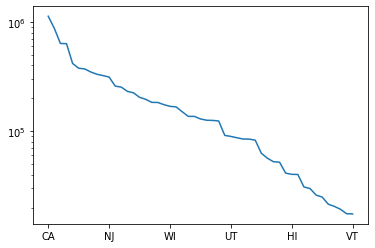

In [27]:
df.state.value_counts().plot()
plt.semilogy()

## Check fertility and mortality distributions
- New simulants should be added at the expected rate  
- 4% of birth events should be twins 
- Every newborn should be assigned at least 1 guardian 
- Simulants should be dying at the expected rate

In [28]:
df

,middle_initial,census_year,zipcode,housing_type,simulant_id,guardian_1,race_ethnicity,date_of_birth,last_name,first_name,age,street_name,city,guardian_2,relation_to_household_head,sex,unit_number,street_number,state
0,M,2020,77566.0,Standard,2284_0,2284_-1,Latino,1982-02-09,Ticas,Michael,38.141742,adams st,sour lake,2284_-1,Reference person,Male,NaN,7136,TX
1,M,2020,77566.0,Standard,2284_1,2284_-1,Latino,1983-09-02,Ticas,Melissa,36.580000,adams st,sour lake,2284_-1,Opp-sex spouse,Female,NaN,7136,TX
2,L,2020,77566.0,Standard,2284_2,2284_0,Latino,2007-10-04,Ticas,Martin,12.492590,adams st,sour lake,2284_1,Biological child,Male,NaN,7136,TX
3,L,2020,77566.0,Standard,2284_3,2284_0,Latino,2011-11-09,Ticas,Maya,8.392918,adams st,sour lake,2284_1,Biological child,Female,NaN,7136,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999996,N,2030,36207.0,Standard,4344_856982,4344_856980,Black,2006-05-22,Eanes,Ayden,23.826587,n vail ave,birmingham,4344_856981,Reference person,Male,NaN,217,AL
9999997,F,2030,80017.0,Standard,4344_856984,4344_-1,White,1947-12-27,Smith,Jenny,82.229716,dunlavin gln rd,dumont,4344_-1,Reference person,Female,NaN,206,CO
9999998,R,2030,34953.0,Standard,4344_856985,4344_-1,White,1955-03-08,Supeck,Betty,75.034620,tranquilla dr,pensacola,4344_-1,Reference person,Female,NaN,343,FL
9999999,D,2030,68333.0,Standard,4344_856986,4344_-1,Black,1959-01-09,Supeck,Ed,71.193217,stillwell avenue,gretna,4344_-1,Reference person,Male,NaN,233,NE


## Checking physical address distributions
- Every person in a given household should have the same address (I have no idea how to check this if I am defining household by physical address...)
- Zip code should match PUMA 
- Street should conform to typical expectations 